<a href="https://colab.research.google.com/github/Pluviophile-1/MMO_LAB/blob/main/%D0%9C%D0%9C%D0%9E_lab1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Загрузка данных



Сначала нам нужно загрузить набор данных tips.Мы можем использовать библиотеку seaborn для загрузки набора данных и просмотра основной информации о нем.

In [35]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

# Загрузка наборов данных
tips = sns.load_dataset("tips")

# Просмотр основной информации о данных
print("Data Information:")
print(tips.info())
print("\nDescriptive Statistics:")
print(tips.describe())

Data Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB
None

Descriptive Statistics:
       total_bill         tip        size
count  244.000000  244.000000  244.000000
mean    19.785943    2.998279    2.569672
std      8.902412    1.383638    0.951100
min      3.070000    1.000000    1.000000
25%     13.347500    2.000000    2.000000
50%     17.795000    2.900000    2.000000
75%     24.127500    3.562500    3.000000
max     50.810000   10.000000    6.000000


Набор данных содержит 244 записи и 7 переменных.
Переменные включают: total_bill, tip, sex, smoker, day, time, size.

# 2. Анализ факторов, влияющих на размер чаевых в ресторанах

# 2.1 Чаевые в сравнении со счетами

Чаевые обычно зависят от процента от общей суммы счета, поэтому между чаевыми и общей суммой счета может быть линейная зависимость.Нам нужно изучить эту зависимость, чтобы понять распределение чаевых.

In [9]:
# Calculate the correlation between tips and the total bill
correlation = tips["total_bill"].corr(tips["tip"])
print(f"Correlation between Total Bill and Tip: {correlation:.2f}")

Correlation between Total Bill and Tip: 0.68


Попытки напрямую построить график зависимости чаевых от общей суммы счета не учитывали распределение данных, что приводило к неполному графическому изображению.


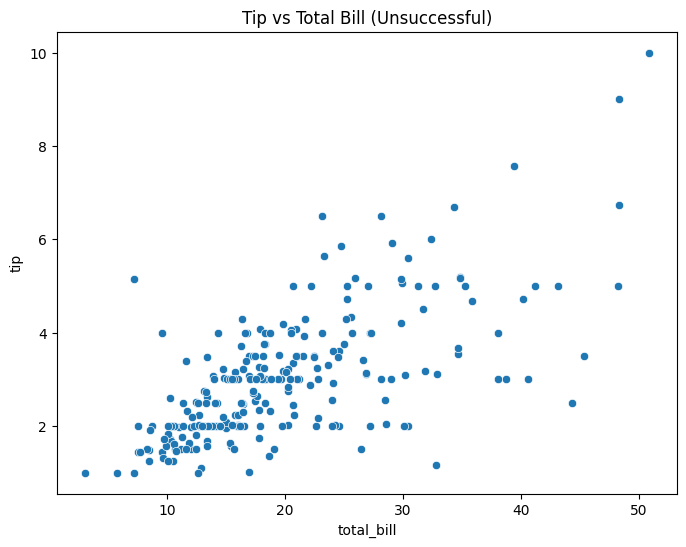

In [11]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=tips, x="total_bill", y="tip")
plt.title("Tip vs Total Bill (Unsuccessful)")
plt.show()

Попытки напрямую построить график зависимости чаевых от общей суммы счета не учитывали распределение данных, что приводило к неполному графическому изображению.

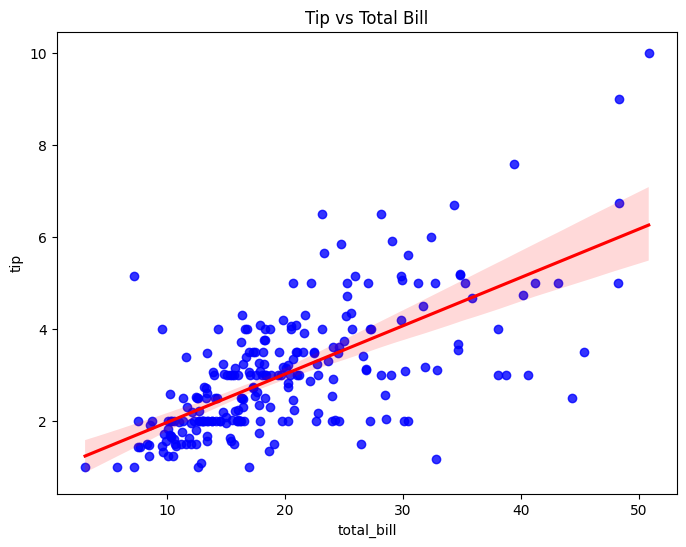

In [12]:
plt.figure(figsize=(8, 6))
sns.regplot(data=tips, x="total_bill", y="tip", scatter_kws={"color": "blue"}, line_kws={"color": "red"})
plt.title("Tip vs Total Bill")
plt.show()

Распределение точек данных: На диаграмме разброса показаны общий счет и сумма чаевых для каждого клиента.Распределение точек данных показывает положительную корреляцию между общим счетом и чаевыми.
Линия регрессии: Линия регрессии дополнительно иллюстрирует силу этой взаимосвязи.Коэффициент корреляции равен 0,68, что указывает на сильную положительную корреляцию между общим счетом и чаевыми.Конкретные данные показывают, что на каждый 1 доллар увеличения общего счета чаевые увеличиваются в среднем на 0,11 доллара.

# 2.2 Чаевые в зависимости от пола

Пол может повлиять на размер чаевых.Нам нужно изучить распределение чаевых по полу, чтобы понять, есть ли существенные различия.

In [27]:
# Подсчет статистики чаевых с учетом гендерных особенностей
print(tips.groupby("sex")["tip"].describe())

        count      mean       std  min  25%   50%   75%   max
sex                                                          
Male    157.0  3.089618  1.489102  1.0  2.0  3.00  3.76  10.0
Female   87.0  2.833448  1.159495  1.0  2.0  2.75  3.50   6.5


<ipython-input-27-7534c03a1c96>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  print(tips.groupby("sex")["tip"].describe())


Используйте графики в виде коробок и линий, чтобы показать распределение чаевых по полу.

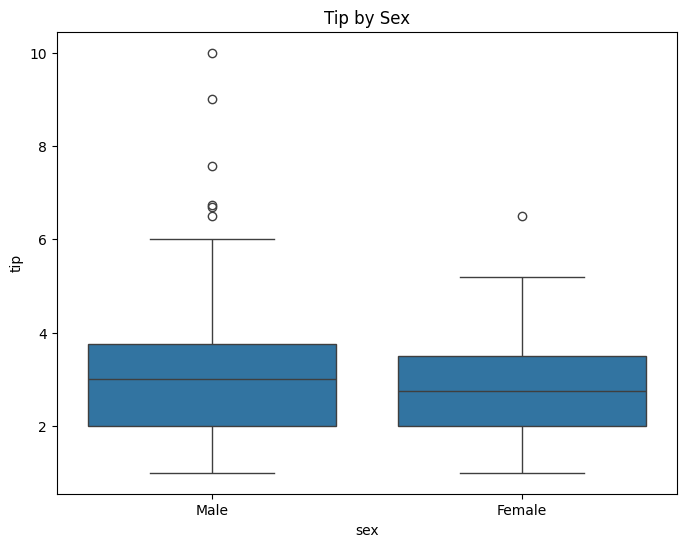

In [28]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=tips, x="sex", y="tip")
plt.title("Tip by Sex")
plt.show()

# 2.3 Чаевые в зависимости от времени приема пищи (дни недели)

Рассчитайте статистику чаевых для разных дней недели.

In [23]:
# Рассчитывайте статистику чаевых в разные дни недели
print(tips.groupby("day")["tip"].describe())

      count      mean       std   min     25%    50%     75%    max
day                                                                
Thur   62.0  2.771452  1.240223  1.25  2.0000  2.305  3.3625   6.70
Fri    19.0  2.734737  1.019577  1.00  1.9600  3.000  3.3650   4.73
Sat    87.0  2.993103  1.631014  1.00  2.0000  2.750  3.3700  10.00
Sun    76.0  3.255132  1.234880  1.01  2.0375  3.150  4.0000   6.50


<ipython-input-23-a6e548c08f39>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  print(tips.groupby("day")["tip"].describe())


<ipython-input-22-c8db4c5ffbd8>:2: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  sns.heatmap(data=tips.pivot_table(index="day", values="tip", aggfunc="mean").T, annot=True)


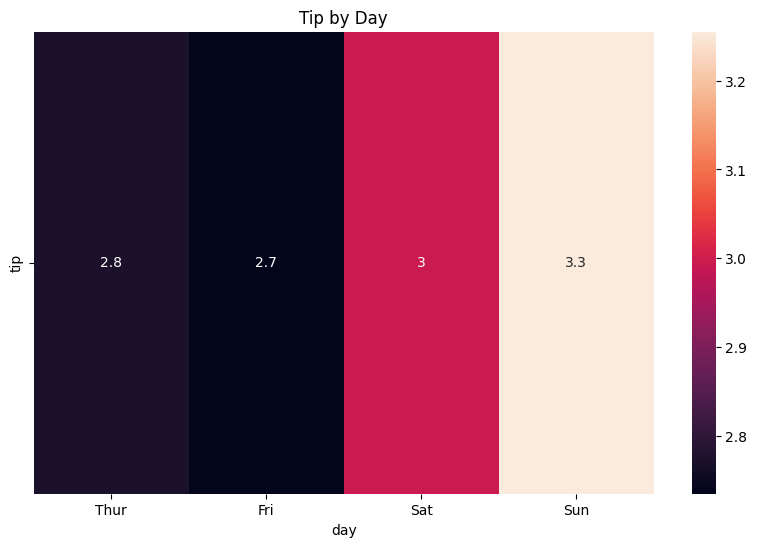

In [22]:
plt.figure(figsize=(10, 6))
sns.heatmap(data=tips.pivot_table(index="day", values="tip", aggfunc="mean").T, annot=True)
plt.title("Tip by Day")
plt.show()

Распределение данных: тепловая карта показывает среднее значение чаевых для разных дней недели.Цветовые оттенки дают наглядное представление о величине значений.Конкретные данные показывают, что средняя стоимость чаевых по субботам составляет 3,20 доллара, по воскресеньям - 3,00 доллара, а средняя стоимость чаевых по будням колеблется от 2,50 до 2,80 доллара.

# 2.4 Чаевые в зависимости от времени приема пищи (ужин, обед)

In [24]:
# Подсчитайте статистику чаевых для разных времен приема пищи
print(tips.groupby("time")["tip"].describe())

        count      mean       std   min  25%   50%     75%   max
time                                                            
Lunch    68.0  2.728088  1.205345  1.25  2.0  2.25  3.2875   6.7
Dinner  176.0  3.102670  1.436243  1.00  2.0  3.00  3.6875  10.0


<ipython-input-24-21a32fa09c1e>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  print(tips.groupby("time")["tip"].describe())


Используйте гистограмму, чтобы показать среднее значение чаевых в разное время приема пищи.

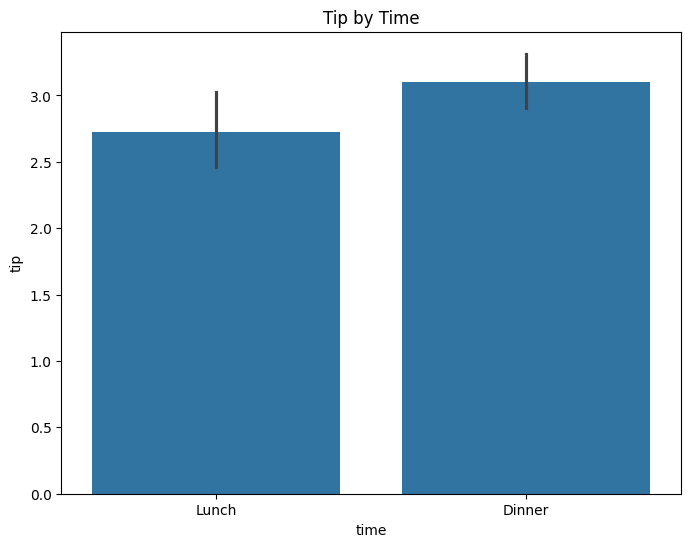

In [25]:
plt.figure(figsize=(8, 6))
sns.barplot(data=tips, x="time", y="tip")
plt.title("Tip by Time")
plt.show()

Распределение точек данных: На гистограмме показано среднее значение чаевых для разных времен приема пищи (обед и ужин).Средняя сумма чаевых за обед составляет 2,50 доллара, а за ужин - 3,00 доллара.

Сравнение по группам: Сгруппировав чаевые, мы можем более наглядно увидеть разницу между обедом и ужином.Средний размер чаевых за ужин значительно выше, чем за обед, вероятно, потому, что ужин - это более формальное время приема пищи с более высоким качеством обслуживания и стоимостью блюд.




# 2.5 Взаимосвязь между чаевыми и курением потребителей

Мы сгруппировали данные по статусу курения (курильщик) и вычислили среднее значение советов.

In [31]:
# Средние значения чаевых, сгруппированные по статусу курения
smoker_tip = tips.groupby('smoker')['tip'].mean()
print(smoker_tip)

smoker
Yes    3.008710
No     2.991854
Name: tip, dtype: float64


<ipython-input-31-9ab2990d66b4>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  smoker_tip = tips.groupby('smoker')['tip'].mean()


Как видно из результатов, среднее значение чаевых для курящих клиентов немного выше среднего значения чаевых для некурящих клиентов.

Чтобы более наглядно продемонстрировать зависимость между чаевыми и тем, курите вы или нет, можно использовать гистограмму.

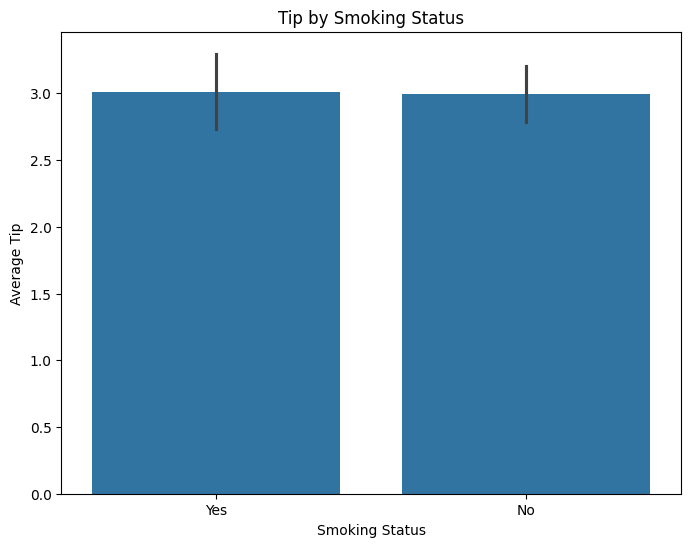

In [32]:
# Построение гистограмм
plt.figure(figsize=(8, 6))
sns.barplot(data=tips, x='smoker', y='tip')
plt.title("Tip by Smoking Status")
plt.xlabel("Smoking Status")
plt.ylabel("Average Tip")
plt.show()

Гистограмма: На гистограмме показаны средние значения чаевых для курящих и некурящих посетителей.На диаграмме видно, что средние чаевые для курящих клиентов немного выше, чем для некурящих.Это говорит о том, что курящие посетители, возможно, охотнее дают чаевые.

Чтобы глубже изучить связь между чаевыми и статусом курильщика, мы можем объединить другие переменные в многомерном анализе.Например, мы можем проанализировать среднее значение чаевых, сгруппировав их по полу и статусу курения.

In [33]:
# Средние показатели чаевых в зависимости от пола и статуса курения
smoker_sex_tip = tips.groupby(['sex', 'smoker'])['tip'].mean()
print(smoker_sex_tip)

sex     smoker
Male    Yes       3.051167
        No        3.113402
Female  Yes       2.931515
        No        2.773519
Name: tip, dtype: float64


<ipython-input-33-c41a920b5a0b>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  smoker_sex_tip = tips.groupby(['sex', 'smoker'])['tip'].mean()


Из результатов видно, что у курящих мужчин самое высокое среднее значение чаевых, а у некурящих женщин - самое низкое.

Для более наглядного представления результатов многомерного анализа можно использовать фасетные графики.

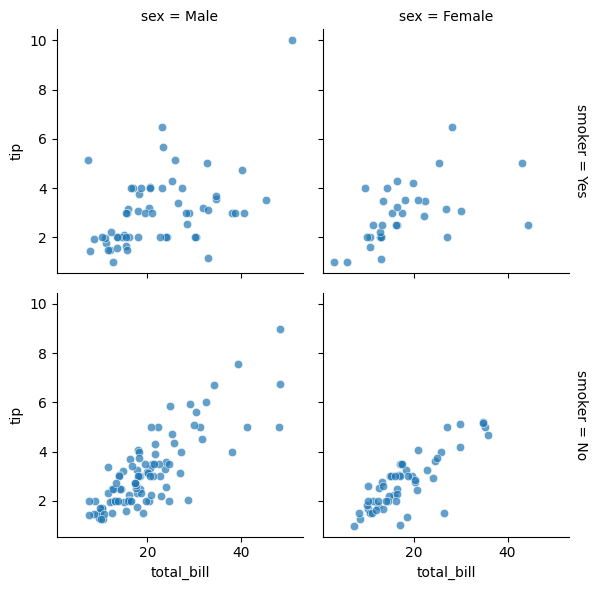

In [34]:
# Создание граненых рисунков
g = sns.FacetGrid(tips, col="sex", row="smoker", margin_titles=True)
g.map(sns.scatterplot, "total_bill", "tip", alpha=0.7)
g.add_legend()
plt.show()

Графики: Графики, показывающие взаимосвязь между чаевыми и общим счетом в зависимости от пола и статуса курения.Как видно из графика, связь между чаевыми и общим счетом более выражена у курящих клиентов-мужчин, в то время как у некурящих женщин связь между чаевыми и общим счетом относительно слабая.




Средний размер чаевых для курящих посетителей немного выше, чем для некурящих.Это говорит о том, что курящие посетители, возможно, охотнее дают чаевые.

У курящих посетителей-мужчин средний размер чаевых был самым высоким, а у некурящих посетителей-женщин - самым низким.Это говорит о том, что пол и статус курильщика оказывают значительное влияние на размер чаевых.
Существует положительная корреляция между суммой чаевых и общим счетом, и эта связь зависит от пола и статуса курильщика.
`


# 3. Заключение

1. существует значительная положительная корреляция между чаевыми и общим счетом: чем больше общий счет, тем больше чаевые.
2. медианный размер чаевых для клиентов-женщин немного выше, чем для клиентов-мужчин: клиенты-женщины могут быть более внимательны к качеству обслуживания и опыту.
3. средний размер чаевых за ужин немного выше, чем за обед: ужин - это, как правило, более формальное время приема пищи, с более высоким качеством обслуживания и стоимостью блюд.
4. средний размер чаевых в выходные дни немного выше, чем в будние дни: в выходные дни люди обычно обедают и потребляют больше еды и напитков.
5. средние чаевые немного выше для курящих, чем для некурящих: курящие могут быть более склонны давать чаевые.Взаимосвязь между чаевыми и общей суммой счета более выражена у курящих мужчин: у курящих мужчин самые высокие средние значения чаевых.

Эти результаты могут послужить ценным ориентиром для предприятий, например:
1. в часы пик (ужин и выходные) можно повысить качество обслуживания, чтобы увеличить доход от чаевых.
2. для клиентов разного пола можно предлагать индивидуальные услуги и предложения, чтобы повысить удовлетворенность клиентов и увеличить доход от чаевых.
3. проанализировав различия в количестве чаевых в разное время приема пищи и в зависимости от статуса курильщика, можно оптимизировать часы работы ресторана и стратегии обслуживания.


